In [24]:
import numpy as np
import scipy as sp
from scipy.special import softmax

In [25]:
def softmax2(x: np.ndarray) -> np.ndarray:
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [26]:
arr = np.array([1.0, 2.0, 3.0])
arr.shape

(3,)

In [27]:
softmax(arr).shape

(3,)

In [ ]:
print(arr / arr.sum())
print((arr / arr.sum()).sum())
print(softmax(arr))
print(softmax(arr).sum())
print(softmax2(arr))
print(softmax2(arr).sum())

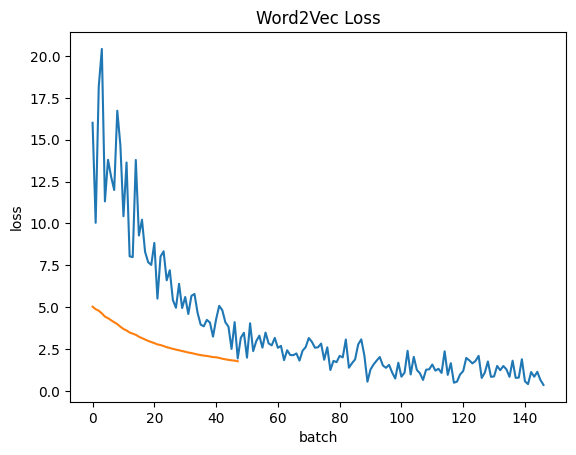

In [93]:
import re
from typing import Optional

# extract loss from a line like "epoch 0 batch 500 loss: 11.780001 avg_loss: 11.592569 lr: 0.05"
def extract_loss(line: str) -> Optional[float]:
    m = re.search(r"loss=(\d+\.\d+)", line)
    if m:
        return float(m.group(1))
    else:
        return None

global losses
with open("data/word2vec.log") as f:
    losses = np.array([extract_loss(line) for line in f]).astype(np.float32)
    losses = losses[~np.isnan(losses)]
# plot losses
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(losses)
# smooth the curve
ax.plot(np.convolve(losses, np.ones(100)/100, mode='valid'))
ax.set_xlabel("batch")
ax.set_ylabel("loss")
ax.set_title("Word2Vec Loss")
plt.show()

